
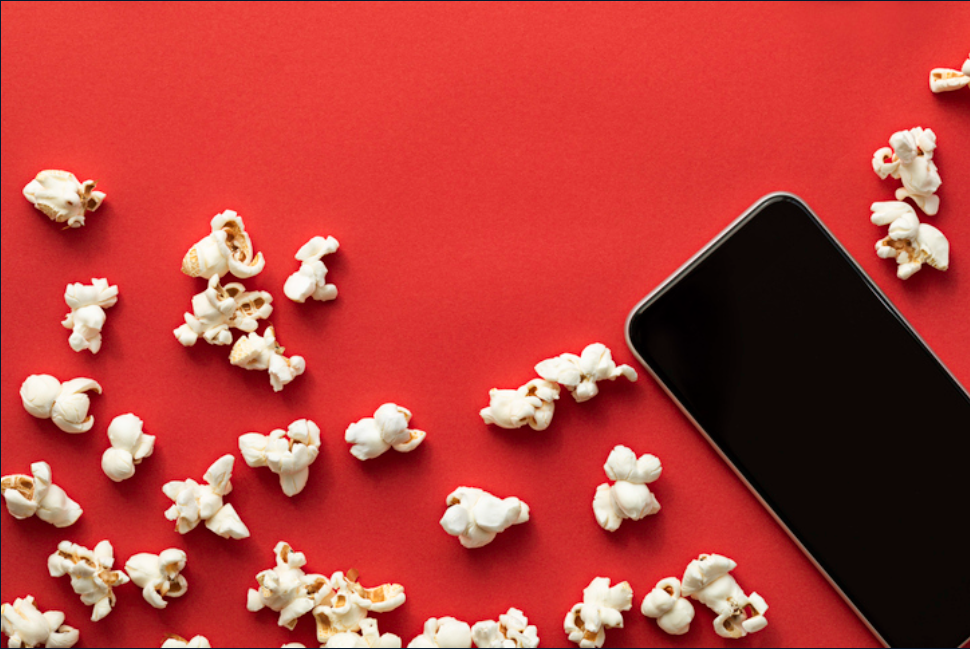

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions. This data does contain null values and some outliers, but handling these is out of scope for the project. Feel free to experiment after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
netflix_df = pd.read_csv('netflix_data.csv', index_col=0)
print(netflix_df)

            type  ...             genre
show_id           ...                  
s1       TV Show  ...  International TV
s2         Movie  ...            Dramas
s3         Movie  ...     Horror Movies
s4         Movie  ...            Action
s5         Movie  ...            Dramas
...          ...  ...               ...
s7783      Movie  ...            Dramas
s7784      Movie  ...            Dramas
s7785      Movie  ...     Documentaries
s7786    TV Show  ...  International TV
s7787      Movie  ...     Documentaries

[7787 rows x 10 columns]


In [ ]:
unique_types = netflix_df['type'].unique()
print(unique_types) #There are only two types in this DataFrame
Movie_count = (netflix_df['type'] == 'Movie').sum() #count the 'Movie' type
print(f"There are {Movie_count} Movie types")
tv_show_count = (netflix_df['type'] == 'TV Show').sum() #count the 'TV Show' type
print(f"There are {tv_show_count} TV Show types")



['TV Show' 'Movie']
There are 5377 Movie types
There are 2410 TV Show types


In [ ]:
filter_TV_Show = netflix_df['type'] != 'TV Show'
netflix_subset = netflix_df[filter_TV_Show]
netflix_subset #Filter the data to remove TV shows and store as netflix_subset.

type  ...          genre
show_id         ...               
s2       Movie  ...         Dramas
s3       Movie  ...  Horror Movies
s4       Movie  ...         Action
s5       Movie  ...         Dramas
s7       Movie  ...  Horror Movies
...        ...  ...            ...
s7782    Movie  ...       Children
s7783    Movie  ...         Dramas
s7784    Movie  ...         Dramas
s7785    Movie  ...  Documentaries
s7787    Movie  ...  Documentaries

[5377 rows x 10 columns]

In [ ]:
netflix_movies = netflix_subset.loc[:, ['title','country','genre','release_year','duration']]
netflix_movies
#Investigate and subset the Netflix movie data, keeping only the columns "title", "country", "genre", "release_year", "duration", and saving this into a new DataFrame called netflix_movies.

title  ... duration
show_id                                           ...         
s2                                          7:19  ...       93
s3                                         23:59  ...       78
s4                                             9  ...       80
s5                                            21  ...      123
s7                                           122  ...       95
...                                          ...  ...      ...
s7782                                       Zoom  ...       88
s7783                                       Zozo  ...       99
s7784                                     Zubaan  ...      111
s7785                          Zulu Man in Japan  ...       44
s7787    ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS  ...       90

[5377 rows x 5 columns]

In [ ]:
long_movies = netflix_movies[netflix_movies['duration'] > 60]
long_movies

title  ... duration
show_id                                           ...         
s2                                          7:19  ...       93
s3                                         23:59  ...       78
s4                                             9  ...       80
s5                                            21  ...      123
s7                                           122  ...       95
...                                          ...  ...      ...
s7781                                        Zoo  ...       94
s7782                                       Zoom  ...       88
s7783                                       Zozo  ...       99
s7784                                     Zubaan  ...      111
s7787    ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS  ...       90

[4931 rows x 5 columns]

In [ ]:
short_movies = netflix_movies[netflix_movies['duration'] < 60]
short_movies.shape[0] #recheck total number of movies
short_movies
#Filter netflix_movies to find the movies that are strictly shorter than 60 minutes, saving the resulting DataFrame as short_movies; inspect the result to find possible contributing factors.

title  ... duration
show_id                                                     ...         
s36                                              #Rucker50  ...       56
s56                    100 Things to do Before High School  ...       44
s68      13TH: A Conversation with Oprah Winfrey & Ava ...  ...       37
s102                                     3 Seconds Divorce  ...       53
s147                                        A 3 Minute Hug  ...       28
...                                                    ...  ...      ...
s7680                      WWII: Report from the Aleutians  ...       45
s7693    Ya no estoy aquí: Una conversación entre Guill...  ...       15
s7719                       Yoo Byung Jae: Discomfort Zone  ...       54
s7772                                                 Zion  ...       12
s7785                                    Zulu Man in Japan  ...       44

[420 rows x 5 columns]

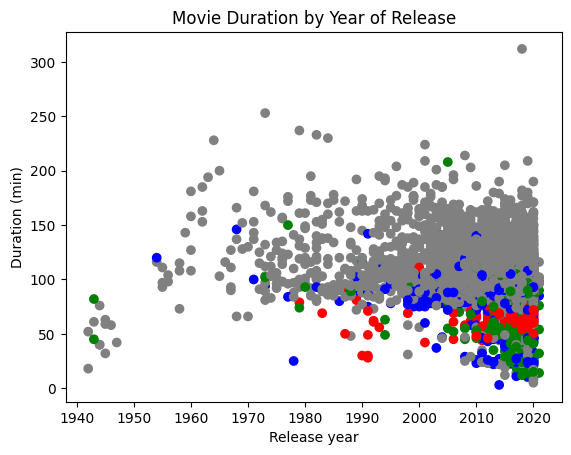

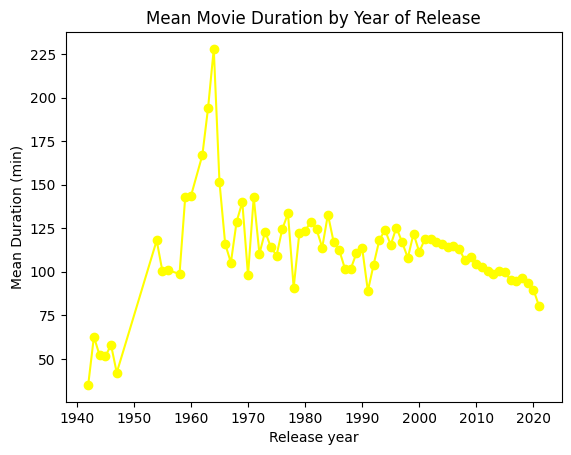

Are we certain that movies are getting shorter?
Yes, movie lengths are getting shorter since 2000.


In [ ]:
colors = []
# Assign colors based on genre groups
for genre in netflix_movies['genre']:
    if genre == 'Children':
        colors.append('blue')
    elif genre == 'Documentaries':
        colors.append('green')
    elif genre == 'Stand-Up':
        colors.append('red')
    elif genre != ('Children','Documentaries','Stand-Up'):
        colors.append('grey')
fig = plt.figure()
plt.scatter(netflix_movies['release_year'], netflix_movies['duration'], c=colors)
plt.title("Movie Duration by Year of Release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")
plt.show()

mean_duration_per_year = netflix_movies.groupby('release_year')['duration'].mean()
#print(mean_duration_per_year)
plt.plot(mean_duration_per_year.index, mean_duration_per_year.values, color='yellow', marker='o', linestyle='-')
plt.title("Mean Movie Duration by Year of Release")
plt.xlabel("Release year")
plt.ylabel("Mean Duration (min)")
plt.show()
print("Are we certain that movies are getting shorter?")
answer = "yes" or "no"
print("Yes, movie lengths are getting shorter since 2000.")

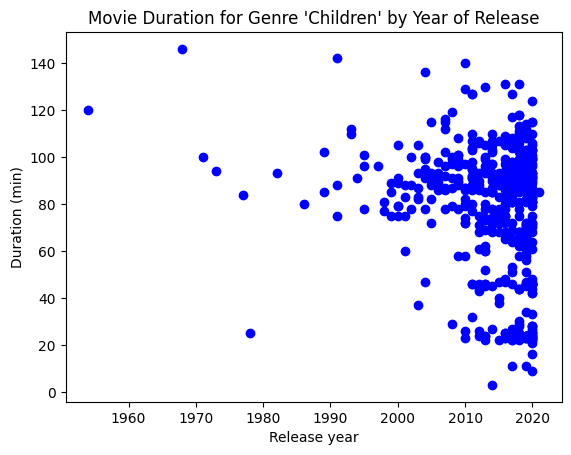

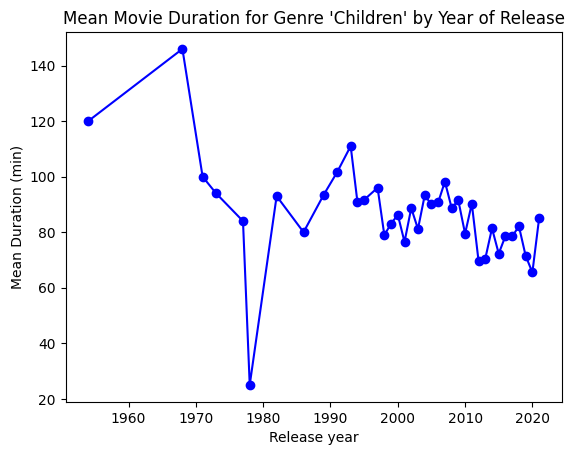

Are we certain that Children movies are getting shorter?
Yes, Children movie lengths are getting shorter since about 1993.


In [ ]:
children_movies = netflix_movies[netflix_movies['genre'] == 'Children']
plt.scatter(children_movies['release_year'], children_movies['duration'], c='blue')
plt.title("Movie Duration for Genre 'Children' by Year of Release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")
plt.show()
#Children Genre
mean_duration_children = children_movies.groupby('release_year')['duration'].mean()
#print(mean_duration_children)
plt.plot(mean_duration_children.index, mean_duration_children.values, color='blue', marker='o', linestyle='-')
plt.title("Mean Movie Duration for Genre 'Children' by Year of Release")
plt.xlabel("Release year")
plt.ylabel("Mean Duration (min)")
plt.show()
print("Are we certain that Children movies are getting shorter?")
answer = "yes" or "no"
print("Yes, Children movie lengths are getting shorter since about 1993.")

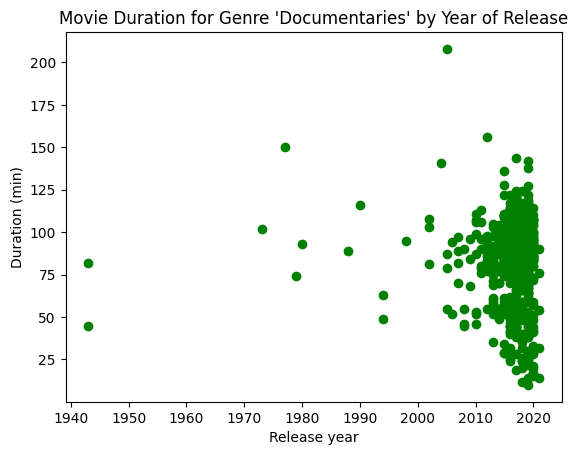

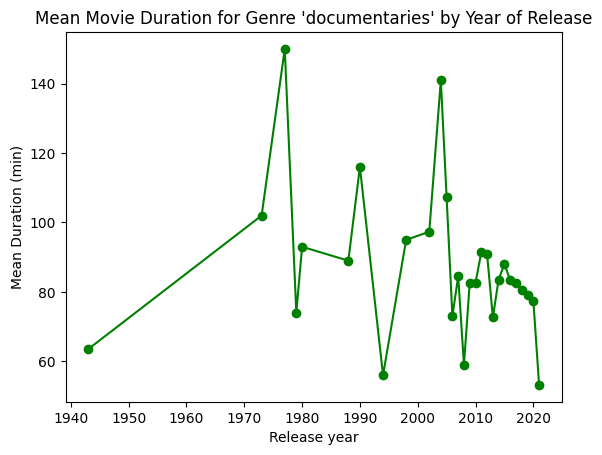

Are we certain that Documentaries movies are getting shorter?
Yes, Documentaries movie lengths are getting shorter since about 1978.


In [ ]:
documentaries_movies = netflix_movies[netflix_movies['genre'] == 'Documentaries']
plt.scatter(documentaries_movies['release_year'], documentaries_movies['duration'], c='green')
plt.title("Movie Duration for Genre 'Documentaries' by Year of Release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")
plt.show()
#Documentaries Genre
mean_duration_documentaries = documentaries_movies.groupby('release_year')['duration'].mean()
#print(mean_duration_documentaries)
plt.plot(mean_duration_documentaries.index, mean_duration_documentaries.values, color='green', marker='o', linestyle='-')
plt.title("Mean Movie Duration for Genre 'documentaries' by Year of Release")
plt.xlabel("Release year")
plt.ylabel("Mean Duration (min)")
plt.show()
print("Are we certain that Documentaries movies are getting shorter?")
answer = "yes" or "no"
print("Yes, Documentaries movie lengths are getting shorter since about 1978.")

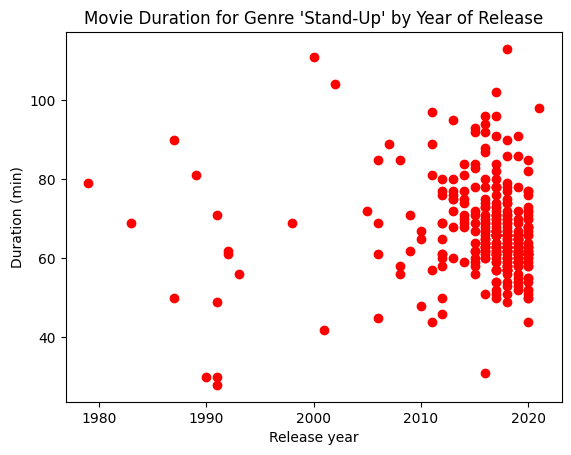

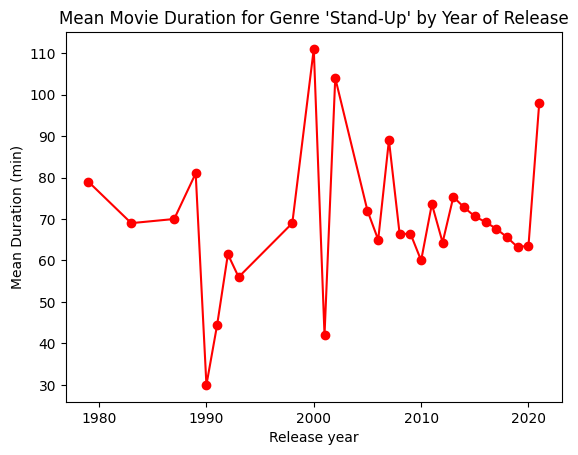

Are we certain that Stand-Up movies are getting shorter?
No, Stand-Up movie lengths are not getting shorter since about 2013.


In [ ]:
stand_up_movies_movies = netflix_movies[netflix_movies['genre'] == 'Stand-Up']
plt.scatter(stand_up_movies_movies['release_year'], stand_up_movies_movies['duration'], c='red')
plt.title("Movie Duration for Genre 'Stand-Up' by Year of Release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")
plt.show()
#Stand-Up Genre
mean_duration_stand_up = stand_up_movies_movies.groupby('release_year')['duration'].mean()
#print(mean_duration_stand_up) #mean duration of stand up
plt.plot(mean_duration_stand_up.index, mean_duration_stand_up.values, color='red', marker='o', linestyle='-')
plt.title("Mean Movie Duration for Genre 'Stand-Up' by Year of Release")
plt.xlabel("Release year")
plt.ylabel("Mean Duration (min)")
plt.show()
print("Are we certain that Stand-Up movies are getting shorter?")
answer = "yes" or "no"
print("No, Stand-Up movie lengths are not getting shorter since about 2013.")

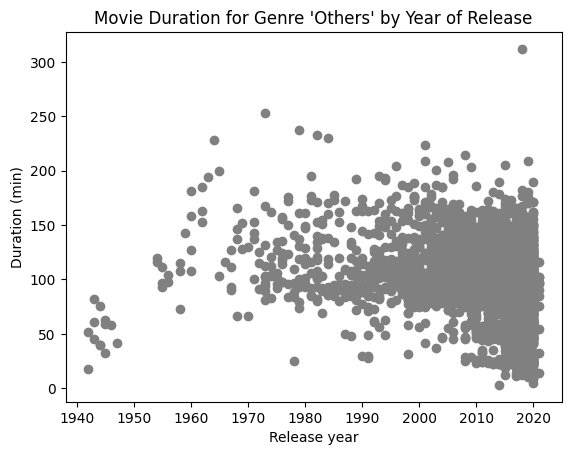

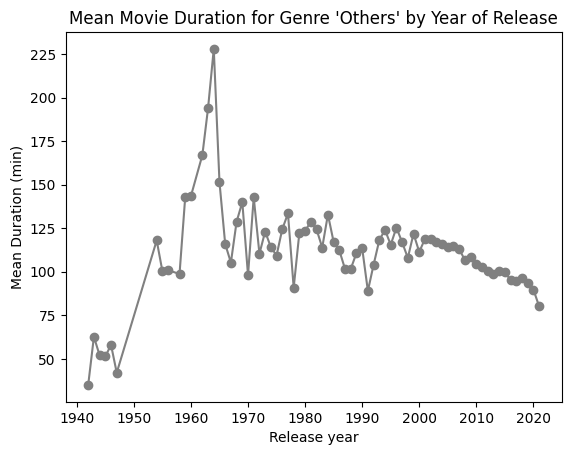

Are we certain that Others movies type are getting shorter?
Yes, Others movies type lengths are getting shorter since about 1965.


In [ ]:
other_movies = netflix_movies[netflix_movies['genre'] != ('Children','Documentaries','Stand-Up')]
plt.scatter(other_movies['release_year'], other_movies['duration'], c='grey')
plt.title("Movie Duration for Genre 'Others' by Year of Release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")
plt.show()
#Others Genre
mean_duration_other = other_movies.groupby('release_year')['duration'].mean()
#print(mean_duration_other)
plt.plot(mean_duration_other.index, mean_duration_other.values, color='grey', marker='o', linestyle='-')
plt.title("Mean Movie Duration for Genre 'Others' by Year of Release")
plt.xlabel("Release year")
plt.ylabel("Mean Duration (min)")
plt.show()
print("Are we certain that Others movies type are getting shorter?")
answer = "yes" or "no"
print("Yes, Others movies type lengths are getting shorter since about 1965.")